In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def get_visibility_by_time(path: str, window: float) -> tuple:
    """Парсит данные и возвращает зависимость видности от времени

    Args:
        path (str): Путь к бинарному файлу с данными
        window (float): Размер окна(в секундах) внутри которого вычисляется видность

    Returns:
        tuple(np.ndarray, np.ndarray): массивы содержащие время и видность
    """
    data = np.fromfile(path, dtype = np.float32)
    tact_freq = np.int64(10 * 1e3) #частота тактования ацп
    time = np.arange(len(data)) / tact_freq
    indecies = np.arange(0, len(time), window * tact_freq).astype(np.int64)
    v, times = [], []
    for index_start, index_end in zip(indecies[:-1], np.roll(indecies, -1)[:-1]):
        time_slice, data_slice = time[index_start:index_end], data[index_start:index_end]
        v.append((np.max(data_slice) - np.min(data_slice)) / (np.max(data_slice) + np.min(data_slice)))
        times.append(np.mean(time_slice))
    return times, v

Text(0.5, 1.0, 'Зависимсоть видности от времени при $L = 24 \\ см$')

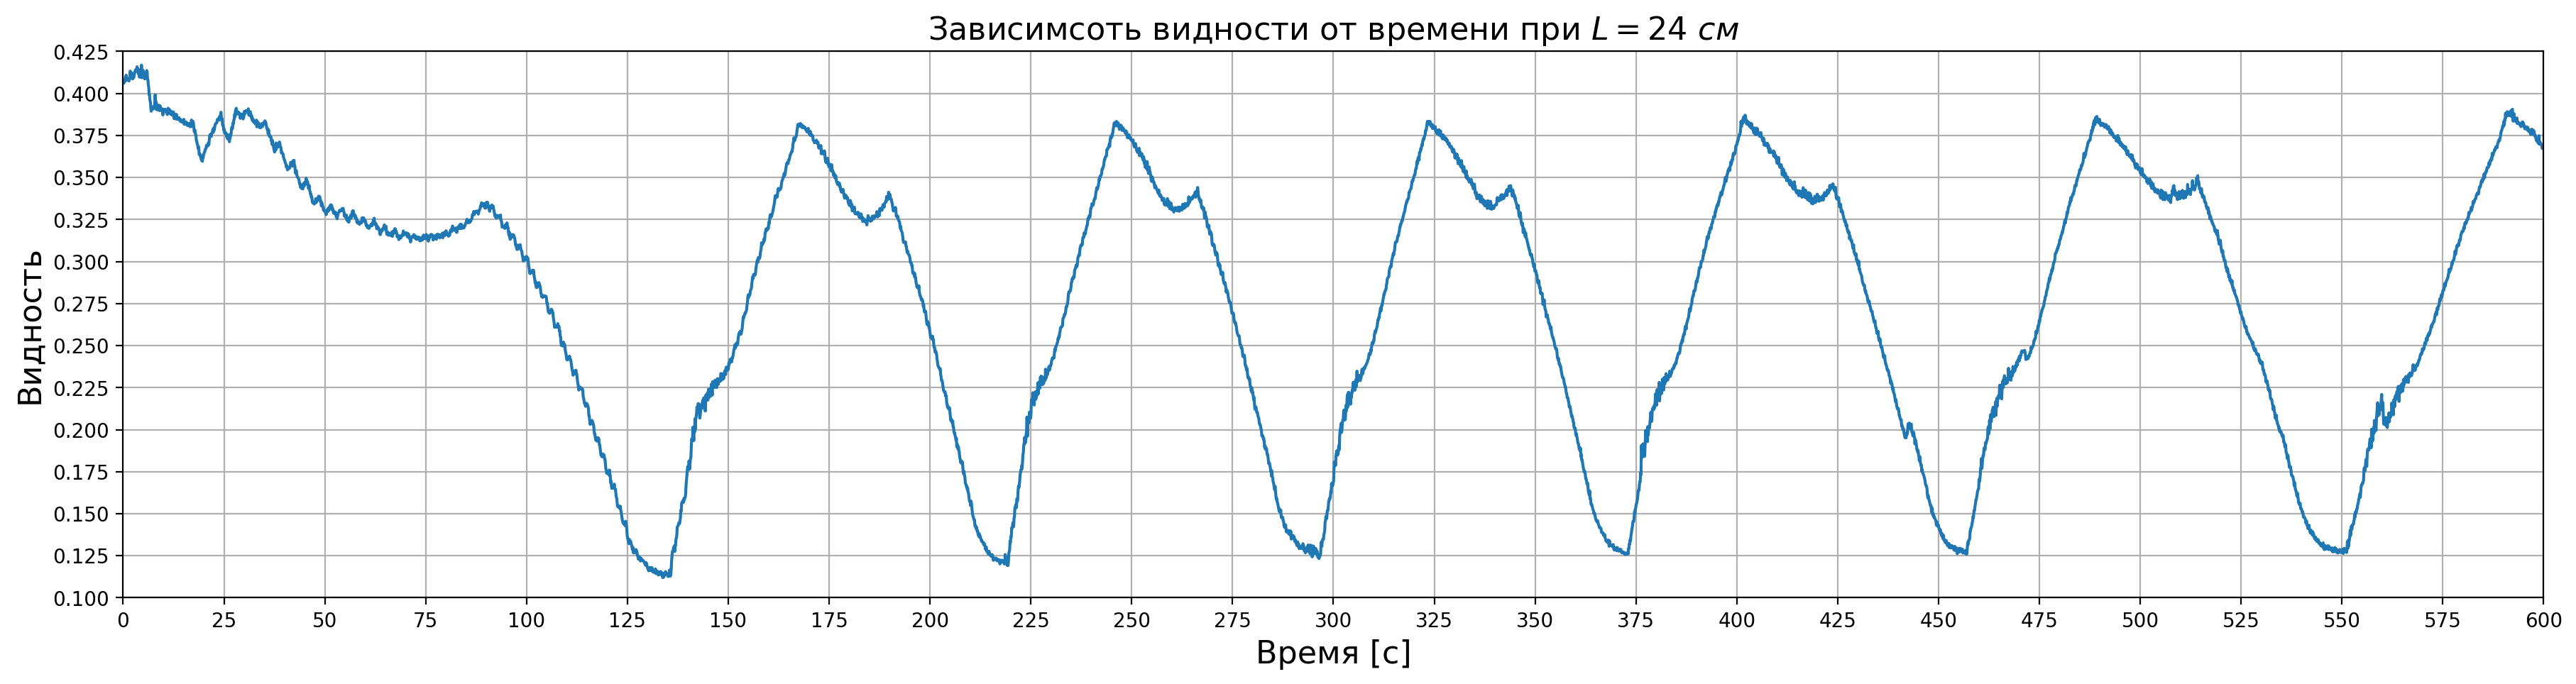

In [24]:
plt.figure(figsize = (22, 5), dpi = 200)
plt.plot(*get_visibility_by_time('24_см.vlt', window = 0.1))
plt.xticks(np.arange(0, 700, 25))
plt.yticks(np.arange(0.1, 0.44, 0.025))
plt.grid(ls = '-')
plt.ylim(0.1, 0.425)
plt.xlim(0, 600)
plt.ylabel("Видность", fontsize = 16)
plt.xlabel("Время [с]", fontsize = 16)
plt.title("Зависимсоть видности от времени при $L = 24 \ см$", fontsize = 16)

Text(0.5, 1.0, 'Зависимсоть видности от времени при $L = 24 \\ см$')

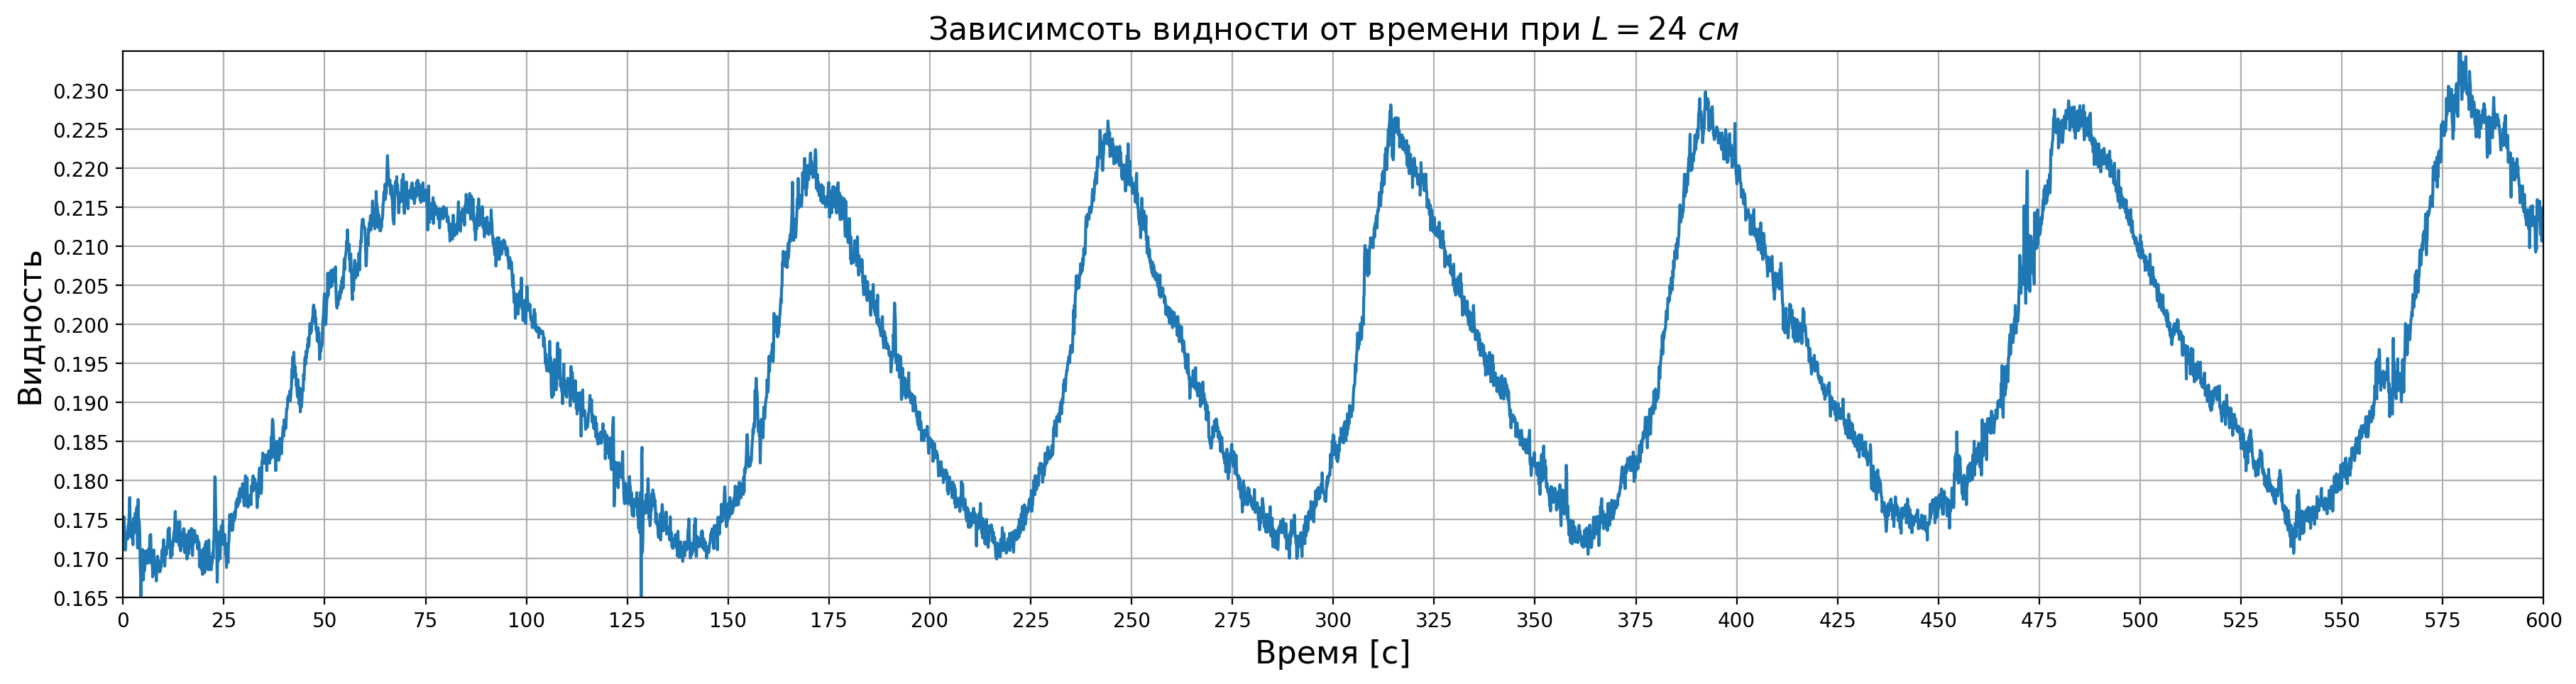

In [37]:
plt.figure(figsize = (22, 5), dpi = 200)
plt.plot(*get_visibility_by_time('16_см.vlt', window = 0.1))
plt.xticks(np.arange(0, 700, 25))
plt.yticks(np.arange(0.1, 0.235, 0.005))
plt.grid(ls = '-')
plt.ylim(0.165, 0.235)
plt.xlim(0, 600)
plt.ylabel("Видность", fontsize = 16)
plt.xlabel("Время [с]", fontsize = 16)
plt.title("Зависимсоть видности от времени при $L = 16 \ см$", fontsize = 16)